In [1]:
 #!pip install wget

In [2]:
import shutil
import os
import zipfile
import glob
from pathlib import Path


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import math

import tensorflow as tf
import wget


In [3]:
l_input_files=['horse-or-human','horses','humans']

In [4]:
l_input_files[0]+'.zip'

'horse-or-human.zip'

In [5]:
# download if horse-or-human.zip is not present
if len([j for j in glob.glob(os.path.join(os.getcwd(),'*')) if os.path.basename(j) ==l_input_files[0]+'.zip'])==0:
    wget.download( 'https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip')
    

# Delete file horse-or-human.zip from current dir
for j in glob.glob(os.path.join(os.getcwd(),'*.zip')):
    if os.path.isfile(j) and Path(j).stem in l_input_files:
        print('Deleting file..{}'.format(os.path.basename(j)))
        #os.remove(j)

In [6]:
# delete the folder or file horse-or-human.zip if it is arelady exists  in data directory
cur_dir=os.getcwd()
data_dir=os.path.join(cur_dir,'data')
#print(data_dir)
for j in glob.glob(os.path.join(data_dir,'*')):
    #print(j)
    if os.path.isdir(j) and Path(j).stem in l_input_files:
        print('Deleting folder..{}'.format(os.path.basename(j)))
        shutil.rmtree(j)
    elif j.endswith('.zip') and os.path.isfile(j) and Path(j).stem in l_input_files :
        print('Deleting file {}'.format(os.path.basename(j)))
        os.remove(j)

Deleting folder..horse-or-human
Deleting file horse-or-human.zip


In [7]:
# copy horse-or-human.zip to data folder
l_file =[j for j in glob.glob(os.path.join(os.getcwd(),'*')) if os.path.basename(j) ==l_input_files[0]+'.zip']
if len(l_file)>0:
    shutil.copy(l_file[0],os.path.join(os.getcwd(),'data'))


In [8]:
# unzip horse-or-human.zip
cur_dir=os.getcwd()
data_dir=os.path.join(cur_dir,'data','*')
ls_files=[f  for f in glob.glob(data_dir) \
          if (Path(f).stem in l_input_files and os.path.basename(f).endswith('zip')) ]
    
#ls_files
for j in ls_files:
    print('extracting Zip..{}'.format(os.path.basename(j)))
    zip_ref = zipfile.ZipFile(j, 'r')
    zip_ref.extractall(os.path.join(cur_dir,'data',l_input_files[0]))
    zip_ref.close()

extracting Zip..horse-or-human.zip


In [9]:
#os.getcwd()
data_dir=os.path.join(os.getcwd(),'data',l_input_files[0])
train_horse_dir = os.path.join(data_dir,'horses')
train_human_dir = os.path.join(data_dir,'humans')

In [10]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


In [11]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [12]:
num_imgs=9
l_idx=0
l_idx=+num_imgs

next_horse_pic = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[l_idx-num_imgs:l_idx]]
next_human_pic = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[l_idx-num_imgs:l_idx]]


In [13]:
print(next_horse_pic)

['C:\\Users\\RPAREPAL\\practice\\DL\\data\\horse-or-human\\horses\\horse01-0.png', 'C:\\Users\\RPAREPAL\\practice\\DL\\data\\horse-or-human\\horses\\horse01-1.png', 'C:\\Users\\RPAREPAL\\practice\\DL\\data\\horse-or-human\\horses\\horse01-2.png', 'C:\\Users\\RPAREPAL\\practice\\DL\\data\\horse-or-human\\horses\\horse01-3.png', 'C:\\Users\\RPAREPAL\\practice\\DL\\data\\horse-or-human\\horses\\horse01-4.png', 'C:\\Users\\RPAREPAL\\practice\\DL\\data\\horse-or-human\\horses\\horse01-5.png', 'C:\\Users\\RPAREPAL\\practice\\DL\\data\\horse-or-human\\horses\\horse01-6.png', 'C:\\Users\\RPAREPAL\\practice\\DL\\data\\horse-or-human\\horses\\horse01-7.png', 'C:\\Users\\RPAREPAL\\practice\\DL\\data\\horse-or-human\\horses\\horse01-8.png']


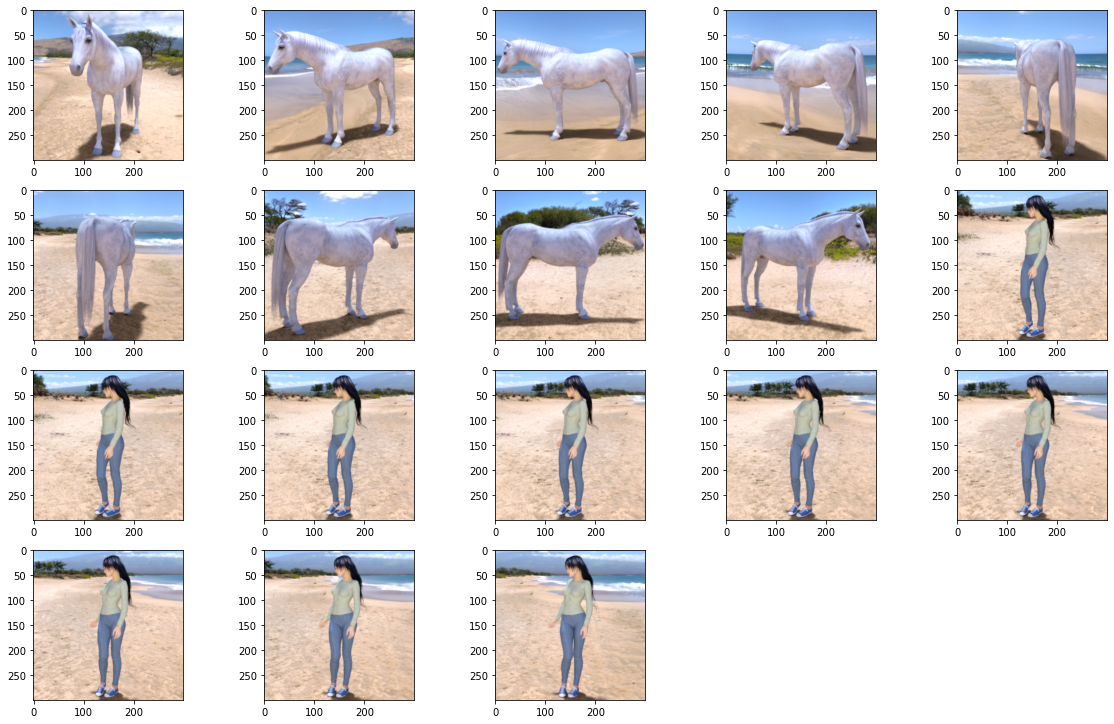

In [14]:
fig=plt.gcf()

nrows = 4
ncols=5

fig.set_size_inches(ncols * 4, nrows * 4)
nrows = math.ceil( (num_imgs*2)/nrows)
#print(ncols)
for i, img_path in enumerate(next_horse_pic+next_human_pic):
    img=mpimg.imread(img_path)
    plt.subplot(nrows,ncols,i+1)#.axis('off')
    plt.imshow(img)
plt.show()
    
    

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
imagegen_preprocess=ImageDataGenerator(rescale=1/255)

In [17]:
imagegen=imagegen_preprocess.flow_from_directory(data_dir,
                                                 target_size=(300,300),
                                                 batch_size=128,
                                                 class_mode='binary'
                                                )

Found 1027 images belonging to 2 classes.


# Build model

model=tf.keras.Sequential()

#x=tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3))

model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))


model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512,activation='relu'))
model.add( tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),metrics=['accuracy'] )
model.summary()

In [18]:
class myCallback(tf.keras.callbacks.Callback):
    # Define the method that checks the accuracy at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.9950):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

In [19]:
# GRADED FUNCTION: convolutional_model
def convolutional_model():
    ### START CODE HERE

    # Define the model
    model1 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

    ### END CODE HERE

    # Compile the model
    model1.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy']) 


    return model1

In [20]:
model = convolutional_model()

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
#history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [21]:
history = model.fit(imagegen,  epochs=20,steps_per_epoch=8, callbacks=[callbacks])

Epoch 1/20
8/8 [==============================] - 30s 3s/step - loss: 0.9385 - accuracy: 0.5317
Epoch 2/20
8/8 [==============================] - 32s 4s/step - loss: 0.5965 - accuracy: 0.6680
Epoch 3/20
8/8 [==============================] - 29s 3s/step - loss: 0.5209 - accuracy: 0.7764
Epoch 4/20
8/8 [==============================] - 30s 4s/step - loss: 0.3247 - accuracy: 0.8621
Epoch 5/20
8/8 [==============================] - 29s 4s/step - loss: 0.2230 - accuracy: 0.9232
Epoch 6/20
8/8 [==============================] - 30s 4s/step - loss: 0.1916 - accuracy: 0.9299
Epoch 7/20
8/8 [==============================] - 29s 4s/step - loss: 0.2740 - accuracy: 0.9055
Epoch 8/20
8/8 [==============================] - 28s 3s/step - loss: 1.4393 - accuracy: 0.8832
Epoch 9/20
8/8 [==============================] - 26s 3s/step - loss: 0.0949 - accuracy: 0.9833
Epoch 10/20
8/8 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9956
Reached 99.5% accuracy so cancelling traini

In [28]:
l_test_file='white-horse-3010129_1920.jpg'
#'white-horse-3010129_1920.jpg'
#'girl-1894125_1920.jpg'
#baby-4100420_1920.jpg'
#'horse-561221_1920.jpg'

test_dir=os.path.join(os.getcwd(),'data','test')
test_file=os.path.join(test_dir,l_test_file)

In [29]:
from keras.preprocessing import image
import numpy as np

In [30]:
img = image.load_img(test_file, target_size=(300, 300))
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
    
if classes[0]>0.5:
    print(l_test_file + " is a human")
else:
    print(l_test_file + " is a horse")
 

[0.2890981]
white-horse-3010129_1920.jpg is a horse


In [31]:
classes

array([[0.2890981]], dtype=float32)

C:\Users\RPAREPAL\AppData\Local\Temp/ipykernel_12496/1698936693.py:46: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


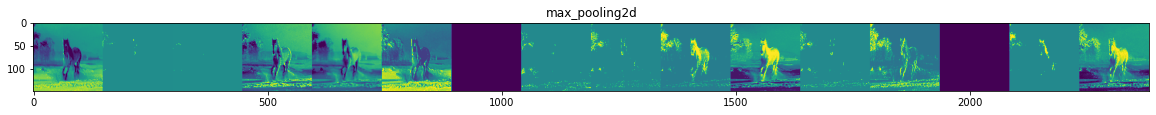

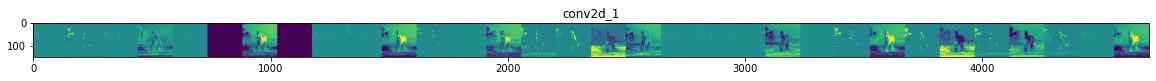

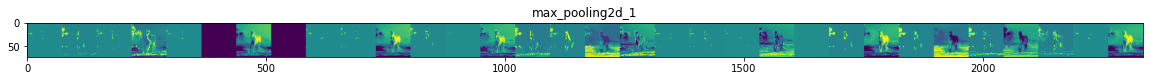

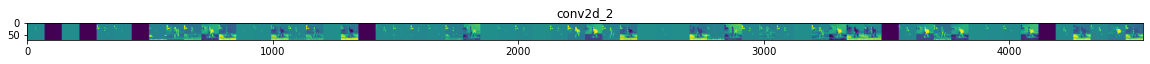

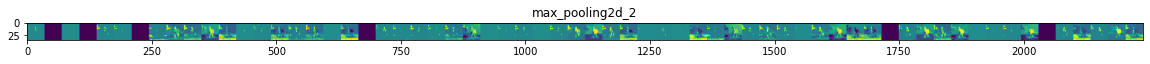

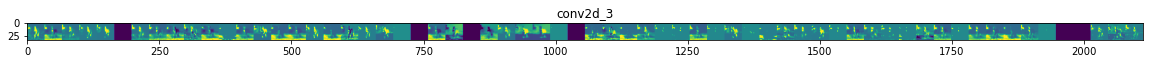

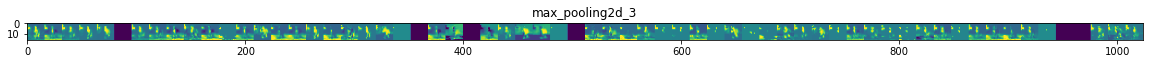

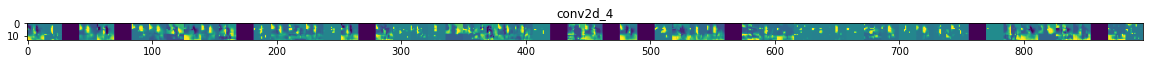

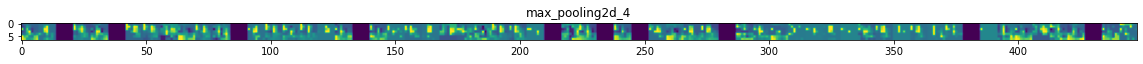

In [32]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
#horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
#human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
#img_path = random.choice(horse_img_files + human_img_files)
img_path=test_file

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

run the following cell to terminate the kernel and free memory resources: